 master-thesisInput:
- True Observations
- Number Training Steps

Output:
- New Model Parameter

Parts of Optimization:
- Initialization of Model Parameter
- tbd

# Initialization

## Import Libraries and Mount Drive

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import torch
from torch import distributions, optim

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/GitHub/master-thesis

import sys
sys.path.append('/content/gdrive/My Drive/GitHub/master-thesis')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/GitHub/master-thesis


In [3]:
#%cd ..

In [4]:
from model.methods import *
from model.modelcore import epid_model
from model.modelhelper import *

## Optimization Settings

In [5]:
observation = 'hospitalization' #'newly_infected' #'hospitalization'
rolling_avg_obs = 2
# Overall Time Period
start_time='2020-06-15' # Mitte November/ Anfang Dezember bis Februar
end_time='2021-02-15' # Begin Vaccination Wave

# Training Time Period
start_time_train=start_time
end_time_train='2021-01-15'

#Test Time Period
start_time_test='2021-01-16'
end_time_test=end_time

dtype = torch.float32
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #cuda:0

## Initialize Observations

In [6]:
df_obs_initial = pd.read_csv('data/220309_observations.csv' , sep=';', thousands='.', decimal=',', encoding='utf-8', parse_dates=['Date'])

# Initialize Observations Training
df_obs_train, initial_newly_infected_train = initialize_observations(df_obs_initial, start=start_time_train, end=end_time_train, rolling_avg=rolling_avg_obs)
observed_train = torch.tensor(df_obs_train[observation], requires_grad=False, device=device, dtype=dtype)

# Initialize Observations Testing
df_obs_test, initial_newly_infected_test = initialize_observations(df_obs_initial, start=start_time_test, end=end_time_test, rolling_avg=rolling_avg_obs)
observed_test = torch.tensor(df_obs_test[observation], requires_grad=False, device=device, dtype=dtype)

# Create df_obs
df_obs = pd.concat([df_obs_train, df_obs_test])

df_obs.head(3)

,Date,number_of_deaths,newly_infected,hospitalization
0,2020-06-15,0.5,29.5,1.5
1,2020-06-16,0.5,42.0,4.5
2,2020-06-17,1.0,59.5,6.0


In [7]:
#for column in df_obs.columns:
#  plt.plot(df_obs['Date'], df_obs[column])
#  plt.title(column)
#  plt.show()

## Initialize Model Parameter

### Initialize helper parameter

In [8]:
cero = torch.tensor(0., requires_grad=False, device=device, dtype=dtype)
#num_observations = df_obs.shape[0]
population = torch.tensor(5793636, requires_grad=False, device=device, dtype=dtype)

### Initialize method parameter

In [9]:
method = TwoClusterLinear(device=device, dtype=dtype)

### Initialize alpha and phi

In [10]:
dict_param = initialize_parameter(['alpha', 'phi'], device, dtype)
dict_param

{'prime_values': {'alpha': tensor(-0.0746, requires_grad=True),
  'phi': tensor(-0., requires_grad=True)},
 'real_values': {'alpha': tensor(0.0100, grad_fn=<AddBackward0>),
  'phi': tensor(25., grad_fn=<AddBackward0>)}}

## Load Method Input Data

In [11]:
method.set_cluster_train(start_time_train, end_time_train)
method.set_cluster_test(start_time_test, end_time_test)

In [12]:
method.cluster_percentage_test.shape

(30,)

# Optimization

## Training

Step: 0, Learning Rate: 0.00999 Time: 0.1671, Training Comparison Loss: 3492.570068359375, Test Comparison Loss: 3244.583251953125


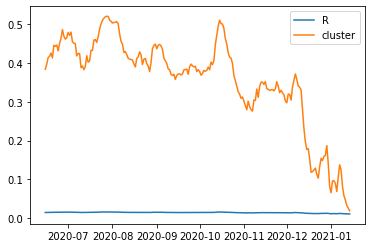

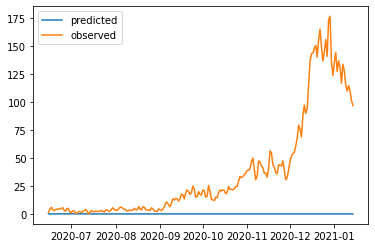

Step: 50, Learning Rate: 0.00950254422568834 Time: 0.2809, Training Comparison Loss: 3491.53125, Test Comparison Loss: 2937.250732421875


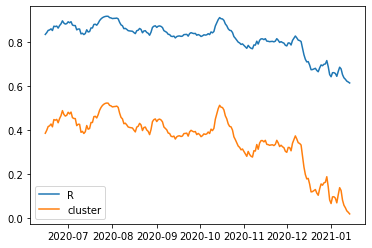

Step: 100, Learning Rate: 0.009038873549665948 Time: 0.1541, Training Comparison Loss: 463.21551513671875, Test Comparison Loss: 1955.1505126953125


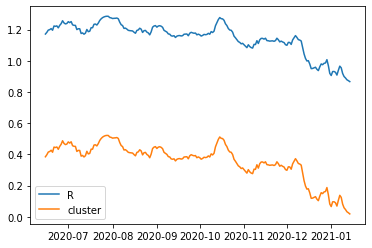

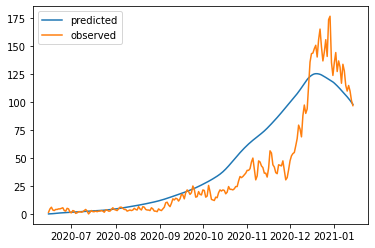

Step: 150, Learning Rate: 0.008597827393003531 Time: 0.1531, Training Comparison Loss: 401.8349914550781, Test Comparison Loss: 1958.37158203125


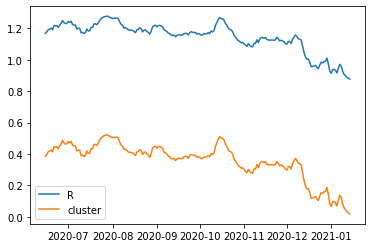

Step: 200, Learning Rate: 0.008178301806491574 Time: 0.0939, Training Comparison Loss: 341.23876953125, Test Comparison Loss: 2193.62646484375


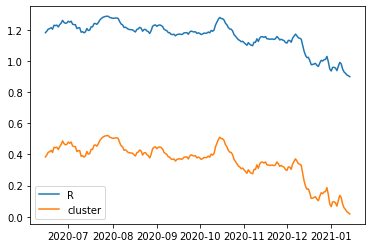

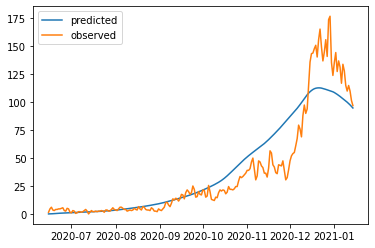

Step: 250, Learning Rate: 0.00777924670742873 Time: 0.1207, Training Comparison Loss: 286.3447265625, Test Comparison Loss: 2739.31591796875


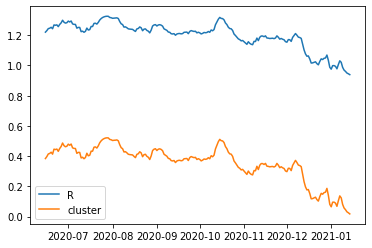

Step: 300, Learning Rate: 0.007399663251239432 Time: 0.1499, Training Comparison Loss: 272.89129638671875, Test Comparison Loss: 2721.008056640625


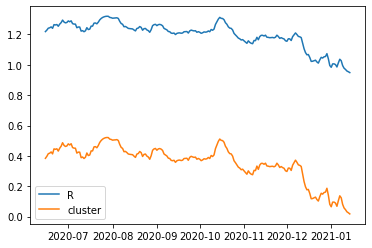

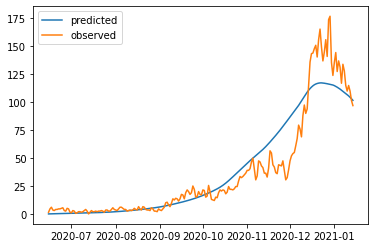

Step: 350, Learning Rate: 0.007038601331341688 Time: 0.1342, Training Comparison Loss: 261.2155456542969, Test Comparison Loss: 2721.075927734375


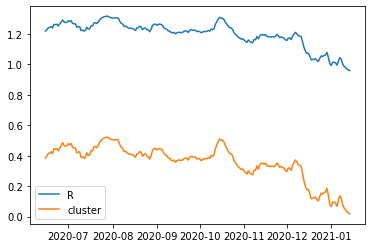

Step: 400, Learning Rate: 0.006695157201007331 Time: 0.0994, Training Comparison Loss: 250.99578857421875, Test Comparison Loss: 2721.76953125


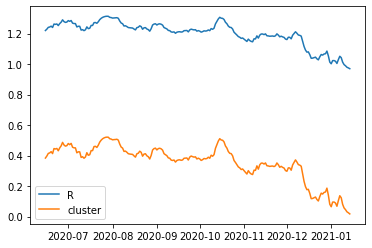

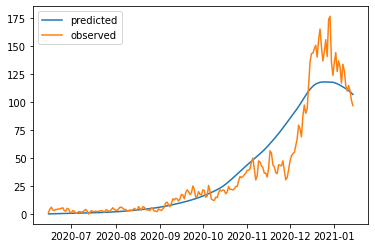

Step: 450, Learning Rate: 0.006368471211262053 Time: 0.0982, Training Comparison Loss: 242.19859313964844, Test Comparison Loss: 2723.4267578125


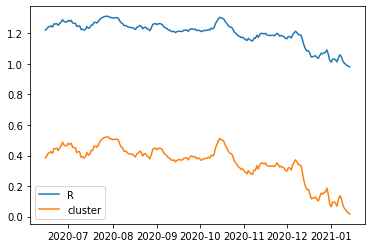

Step: 500, Learning Rate: 0.006057725659163231 Time: 0.1015, Training Comparison Loss: 234.72323608398438, Test Comparison Loss: 2726.06494140625


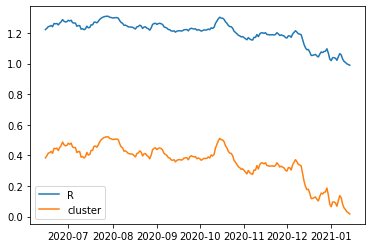

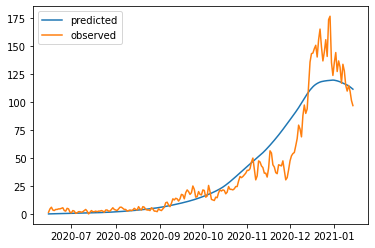

Step: 550, Learning Rate: 0.0057621427410696376 Time: 0.106, Training Comparison Loss: 228.43304443359375, Test Comparison Loss: 2729.5966796875


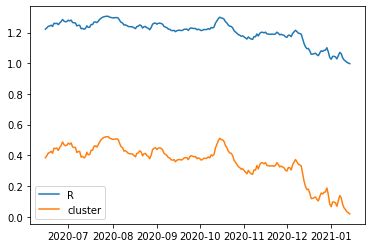

Step: 600, Learning Rate: 0.005480982605780108 Time: 0.1564, Training Comparison Loss: 223.17828369140625, Test Comparison Loss: 2733.933349609375


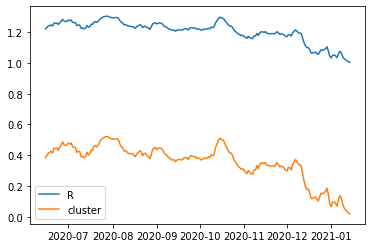

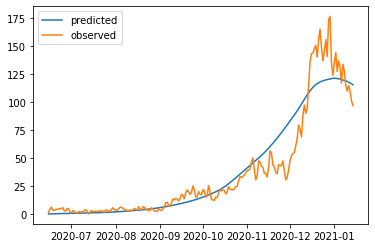

Step: 650, Learning Rate: 0.005213541502668067 Time: 0.1004, Training Comparison Loss: 218.81045532226562, Test Comparison Loss: 2738.970947265625


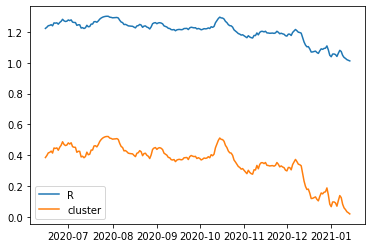

Step: 700, Learning Rate: 0.004959150020176671 Time: 0.1032, Training Comparison Loss: 215.19122314453125, Test Comparison Loss: 2744.592041015625


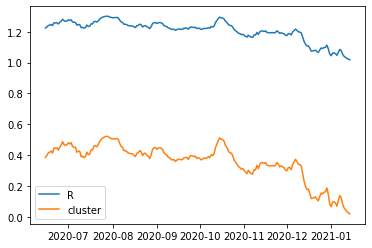

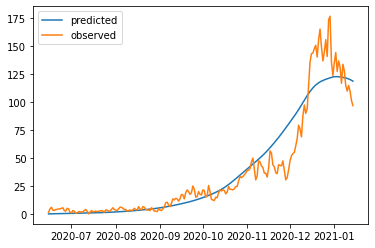

Step: 750, Learning Rate: 0.004717171410265472 Time: 0.128, Training Comparison Loss: 212.19654846191406, Test Comparison Loss: 2750.69287109375


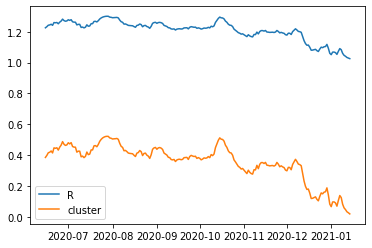

Step: 800, Learning Rate: 0.004486999994614646 Time: 0.1562, Training Comparison Loss: 209.71873474121094, Test Comparison Loss: 2757.1669921875


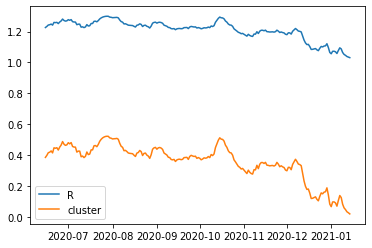

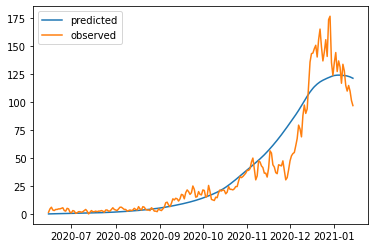

Step: 850, Learning Rate: 0.004268059648597501 Time: 0.1402, Training Comparison Loss: 207.66595458984375, Test Comparison Loss: 2763.8818359375


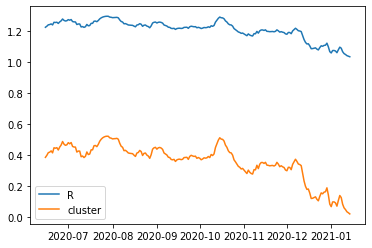

Step: 900, Learning Rate: 0.0040598023592265855 Time: 0.1341, Training Comparison Loss: 205.96151733398438, Test Comparison Loss: 2770.771240234375


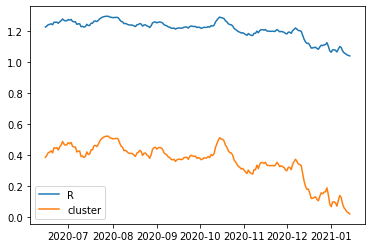

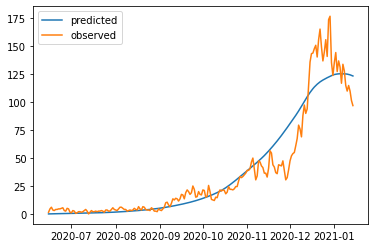

Step: 950, Learning Rate: 0.0038617068534639145 Time: 0.1578, Training Comparison Loss: 204.5413055419922, Test Comparison Loss: 2777.72802734375


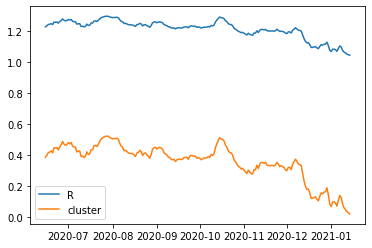

Step: 1000, Learning Rate: 0.0036732772934619236 Time: 0.1303, Training Comparison Loss: 203.35345458984375, Test Comparison Loss: 2784.68603515625


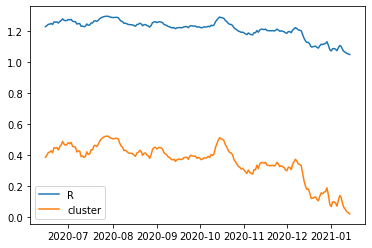

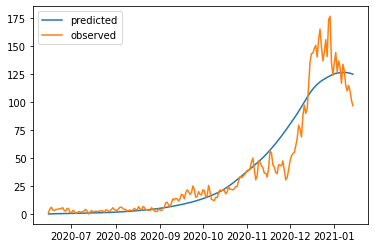

Step: 1050, Learning Rate: 0.00349404203546934 Time: 0.1716, Training Comparison Loss: 202.35519409179688, Test Comparison Loss: 2791.55859375


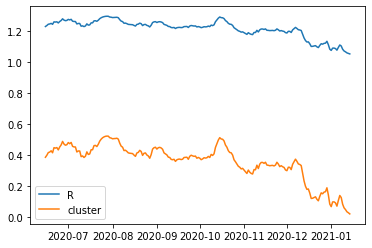

Step: 1100, Learning Rate: 0.0033235524492954472 Time: 0.1096, Training Comparison Loss: 201.51211547851562, Test Comparison Loss: 2798.3115234375


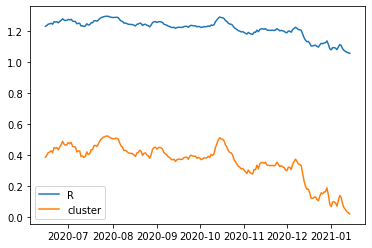

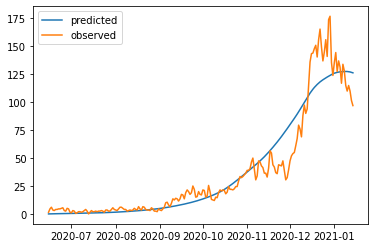

Step: 1150, Learning Rate: 0.0031613817953778573 Time: 0.1733, Training Comparison Loss: 200.79605102539062, Test Comparison Loss: 2804.890380859375


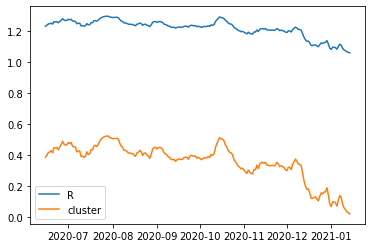

Step: 1200, Learning Rate: 0.0030071241566430543 Time: 0.0975, Training Comparison Loss: 200.1846160888672, Test Comparison Loss: 2811.2568359375


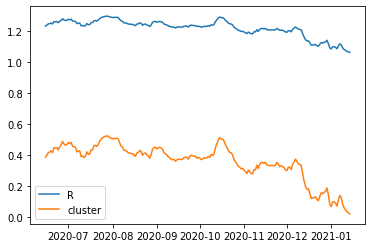

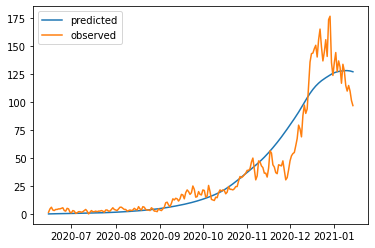

Step: 1250, Learning Rate: 0.0028603934224861256 Time: 0.1006, Training Comparison Loss: 199.6595001220703, Test Comparison Loss: 2817.397705078125


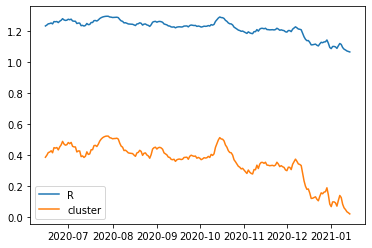

Step: 1300, Learning Rate: 0.0027208223223265725 Time: 0.1389, Training Comparison Loss: 199.20590209960938, Test Comparison Loss: 2823.278076171875


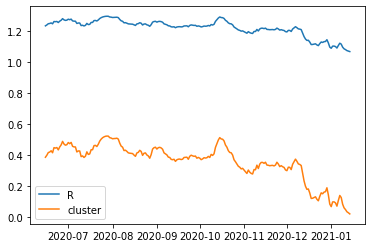

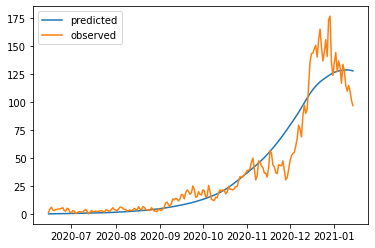

Step: 1350, Learning Rate: 0.002588061506321153 Time: 0.098, Training Comparison Loss: 198.81202697753906, Test Comparison Loss: 2828.907470703125


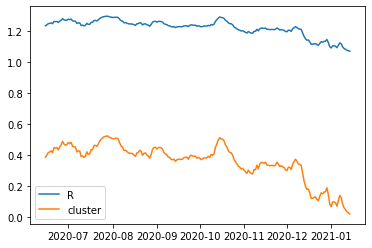

Step: 1400, Learning Rate: 0.002461778670932766 Time: 0.1148, Training Comparison Loss: 198.46812438964844, Test Comparison Loss: 2834.270263671875


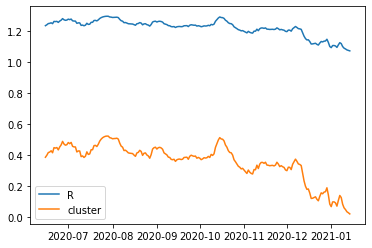

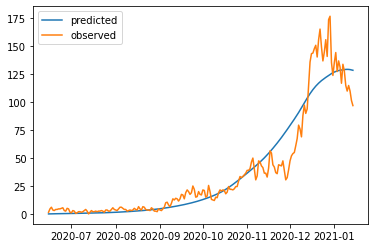

Step: 1450, Learning Rate: 0.0023416577271666533 Time: 0.096, Training Comparison Loss: 198.1662139892578, Test Comparison Loss: 2839.373779296875


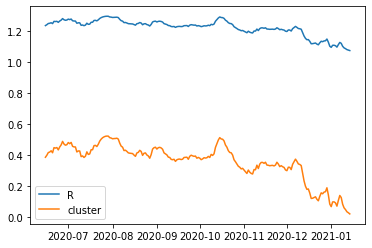

Step: 1500, Learning Rate: 0.0022273980093919887 Time: 0.0946, Training Comparison Loss: 197.89988708496094, Test Comparison Loss: 2844.218994140625


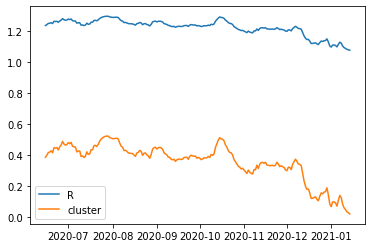

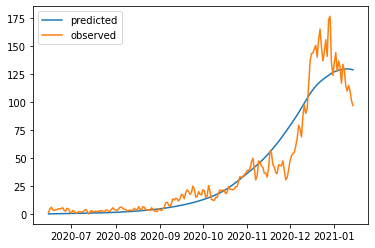

Step: 1550, Learning Rate: 0.0021187135227685237 Time: 0.1059, Training Comparison Loss: 197.66372680664062, Test Comparison Loss: 2848.81787109375


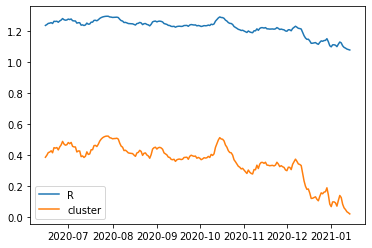

Step: 1600, Learning Rate: 0.002015332227394579 Time: 0.0928, Training Comparison Loss: 197.45346069335938, Test Comparison Loss: 2853.17578125


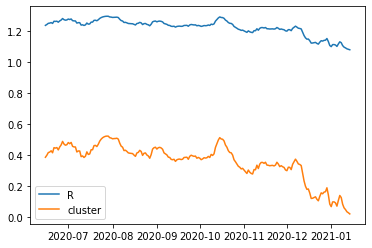

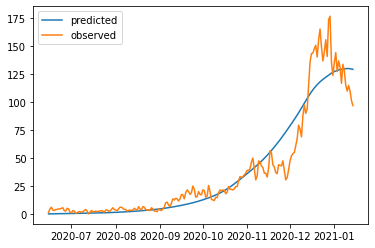

Step: 1650, Learning Rate: 0.0019169953573845828 Time: 0.151, Training Comparison Loss: 197.26536560058594, Test Comparison Loss: 2857.298095703125


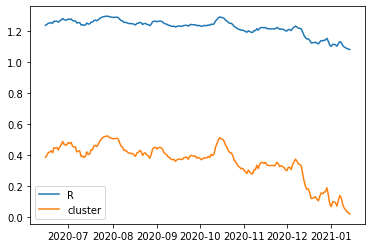

Step: 1700, Learning Rate: 0.0018234567731717946 Time: 0.1011, Training Comparison Loss: 197.0965576171875, Test Comparison Loss: 2861.20751953125


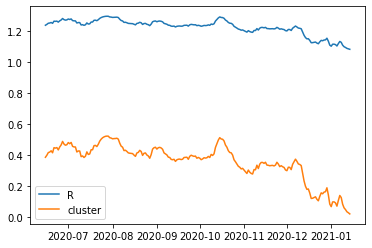

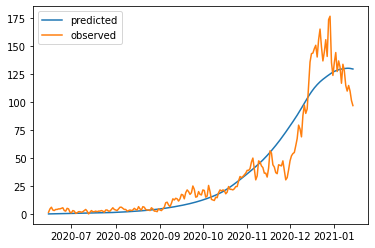

Step: 1750, Learning Rate: 0.0017344823454150087 Time: 0.1116, Training Comparison Loss: 196.94432067871094, Test Comparison Loss: 2864.89892578125


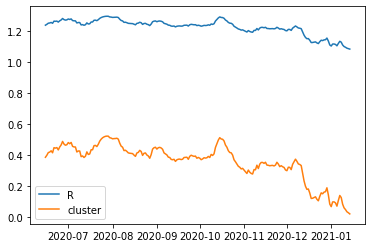

Step: 1800, Learning Rate: 0.0016498493689671438 Time: 0.1001, Training Comparison Loss: 196.8065643310547, Test Comparison Loss: 2868.408935546875


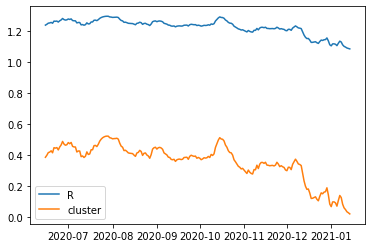

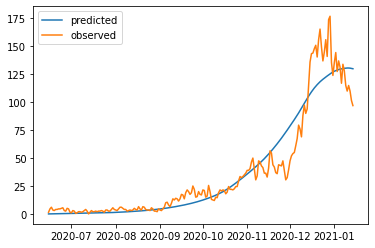

Step: 1850, Learning Rate: 0.0015693460054388676 Time: 0.1391, Training Comparison Loss: 196.6815643310547, Test Comparison Loss: 2871.7275390625


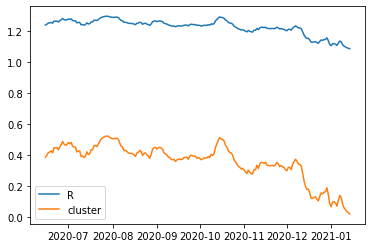

Step: 1900, Learning Rate: 0.0014927707529619797 Time: 0.1098, Training Comparison Loss: 196.5675811767578, Test Comparison Loss: 2874.871826171875


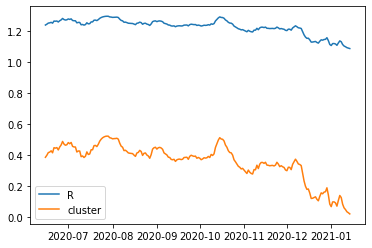

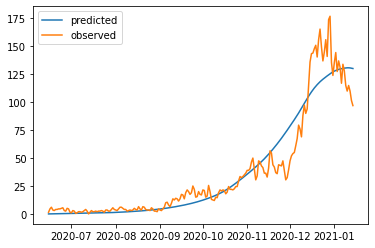

Step: 1950, Learning Rate: 0.0014199319418253553 Time: 0.1045, Training Comparison Loss: 196.46353149414062, Test Comparison Loss: 2877.852783203125


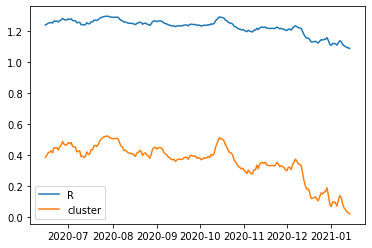

In [13]:
from torch.optim.lr_scheduler import ExponentialLR

epochs = 2000
model_parameter = [dict_param['prime_values']['alpha'], dict_param['prime_values']['phi']]

params_to_be_optimized = method.get_parameters() #+ [dict_param['prime_values']['phi']]
if observation == 'hospitalization':
  params_to_be_optimized = params_to_be_optimized + [dict_param['prime_values']['alpha']]

optimizer = optim.Adam(params_to_be_optimized, lr=0.01)
scheduler = ExponentialLR(optimizer, gamma=0.999)

for i in range(epochs):
  start_time = time.time()
  optimizer.zero_grad()

  # transform alphi, phi
  transform_prime_variables(dict_param)

  # forward pass
  expected = epid_model(population, R=method.calculate_R(method.cluster_percentage_train), initial_newly_infected = initial_newly_infected_train, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation]
  
  # calc loss
  comparison_loss_train =  calc_mse(expected, observed_train) #* dict_param['real_values']['phi']
  method_loss = method.calculate_loss()
  model_param_loss = calc_prior_loss(dict_param, device, dtype)
  loss = comparison_loss_train + method_loss + model_param_loss

  # backward pass
  loss.backward()
  optimizer.step()
  scheduler.step()
  
  
  with torch.no_grad():
    if i % 50==0:
        current_time = round((time.time() - start_time),4)
        current_lr = optimizer.state_dict()['param_groups'][0]['lr']
        expected_test = epid_model(population, R=method.calculate_R(method.cluster_percentage_test), initial_newly_infected = initial_newly_infected_test, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation]
        print(f'Step: {i}, Learning Rate: {current_lr} Time: {current_time}, Training Comparison Loss: {comparison_loss_train}, Test Comparison Loss: {calc_mse(expected_test, observed_test)}')
        plt.plot(df_obs_train['Date'], method.calculate_R(method.cluster_percentage_train).cpu().detach().numpy(), label='R')
        plt.plot(df_obs_train['Date'], method.cluster_percentage_train, label='cluster')
        plt.legend()
        plt.show()
    if i % 100==0:
      #print(method.calculate_R(cluster_percentage))
      plt.plot(df_obs_train['Date'], expected.cpu().detach().numpy(), label='predicted')
      plt.plot(df_obs_train['Date'], observed_train.cpu().detach().numpy(), label='observed')
      plt.legend()
      plt.show()


# Evaluation

## Train and Test Time 

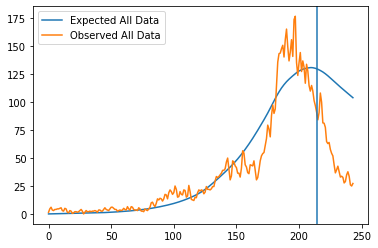

In [14]:
cluster_percentage_train_test = np.concatenate((method.cluster_percentage_train, method.cluster_percentage_test), axis=None)
expected_train_test = epid_model(population, R=method.calculate_R(cluster_percentage_train_test), initial_newly_infected = initial_newly_infected_train, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation]
observed_train_test = torch.concat((observed_train, observed_test))

plt.plot(expected_train_test.cpu().detach().numpy(),label='Expected All Data')
plt.plot(observed_train_test.cpu().detach().numpy(),label='Observed All Data')
plt.axvline(x=observed_train.shape[0])
plt.legend()
plt.show()

## Eval on Test Data # To-Do! - prüfe Start Wert


Comparison Loss Train: 196.3700408935547 - Comparison Loss Test: 72015.609375


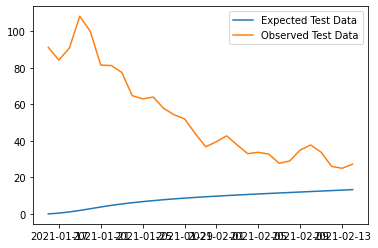

In [15]:
expected_test = epid_model(population, R=method.calculate_R(method.cluster_percentage_test), initial_newly_infected = initial_newly_infected_test, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation]
comparison_loss_test = calc_mse(expected_test, observed_test) * dict_param['real_values']['phi']
print(f'Comparison Loss Train: {comparison_loss_train} - Comparison Loss Test: {comparison_loss_test}')

plt.plot(df_obs_test['Date'], expected_test.cpu().detach().numpy(),label='Expected Test Data')
plt.plot(df_obs_test['Date'], observed_test.cpu().detach().numpy(),label='Observed Test Data')
plt.legend()
plt.show()

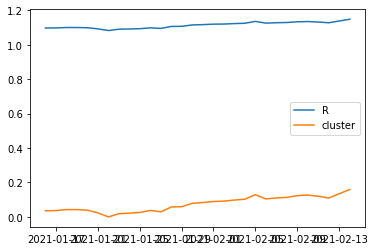

In [16]:
# Plot R-Value & Cluster Percentage
plt.plot(df_obs_test['Date'], method.calculate_R(method.cluster_percentage_test).cpu().detach().numpy(), label='R')
plt.plot(df_obs_test['Date'], method.cluster_percentage_test, label='cluster')
plt.legend()
plt.show()

## Eval What IF

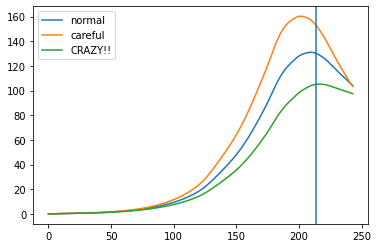

In [17]:
expected_normal = epid_model(population, R=method.calculate_R(cluster_percentage_train_test), initial_newly_infected = initial_newly_infected_train, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation]
expected_careful= epid_model(population, R=method.calculate_R(cluster_percentage_train_test*1.1), initial_newly_infected = initial_newly_infected_train, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation]
expected_crazy = epid_model(population, R=method.calculate_R(cluster_percentage_train_test*0.9), initial_newly_infected = initial_newly_infected_train, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation]

plt.plot(expected_normal.cpu().detach().numpy(),label='normal')
plt.plot(expected_careful.cpu().detach().numpy(),label='careful')
plt.plot(expected_crazy.cpu().detach().numpy(),label='CRAZY!!')
plt.axvline(x=observed_train.shape[0])
plt.legend()
plt.show()

## Eval Cluster Percentage vs R-Value

Slope: 0.41118030391785426, intercept: 1.0827656921714244, r-squared: 0.9999999999997118


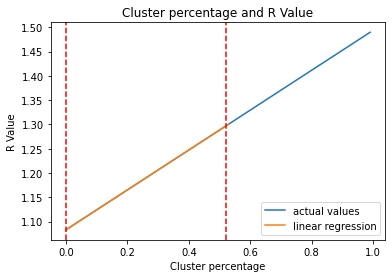

In [18]:
from scipy import stats

x = np.arange(0,1 , 0.01)
y = np.squeeze(method.calculate_R(x).cpu().detach().numpy())


x_min = cluster_percentage_train_test.min()
x_max = cluster_percentage_train_test.max()
x_bound = np.arange(x_min, x_max + 0.01 , 0.01)
y_bound = np.squeeze(method.calculate_R(x_bound).cpu().detach().numpy())

slope, intercept, r_value, p_value, std_err = stats.linregress(x_bound, y_bound)
y_linreg = intercept + slope * x_bound
print(f'Slope: {slope}, intercept: {intercept}, r-squared: {r_value**2}')
plt.plot(x, y, label='actual values')
plt.plot(x_bound, y_linreg, label='linear regression')
plt.axvline(x=x_min, c='r', linestyle='--')
plt.axvline(x=x_max, c='r', linestyle='--')
plt.xlabel('Cluster percentage')
plt.ylabel('R Value')
plt.title('Cluster percentage and R Value')
plt.legend()
plt.show()